In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KalmanFilter import KalmanFilter
from toy_examples import gen_lin_toy_example, gen_nlin_toy_example

In [80]:
"""
def gen_nlin_toy_example(a_0, K):
    a = np.zeros((N, K, 1))
    y = np.zeros((N, K, 1))
    
    a_noise = np.random.normal(loc=0, scale=1, size=(N,K-1,1))
    y_noise = np.random.normal(loc=0, scale=1, size=(N,K,1))
    
    a[:, 0, :] = a_0
    
    for k in range(1, K):
        a[:, k, :] = np.sin(a[:, k-1, :]) + a_noise[:, k-1, :]
    
    y = np.tanh(a) + y_noise
    
    return a,y

def gen_lin_toy_example(a_0, K, F, Q, G, R):
    N, D = a_0.shape
    H, D = G.shape
    
    a = np.zeros((N, K, D))
    y = np.zeros((N, K, H))
    
    a_noise = np.random.multivariate_normal(mean=np.zeros((D,)),
                                            cov=Q,
                                            size=(N,K-1))
    
    y_noise = np.random.multivariate_normal(mean=np.zeros((H,)),
                                            cov=R,
                                            size=(N,K))
    
    a[:, 0, :] = a_0
    
    for k in range(1,K):
        a[:, k, :] = a[:, k-1, :]@(F.T) + a_noise[:, k-1, :]
        
    y = np.einsum('hd, nkd -> nkh', G, a) + y_noise
    
    return a, y
"""

In [9]:
N = 10000
K = 50
D = 1
H = 1
a_0 = np.zeros((N, D))
F = np.ones((D,D))/1000
Q = np.identity(D)

G = np.ones((H,D))/1000
R = np.identity(H)

a, y = gen_lin_toy_example(a_0=a_0,
                    K=K,
                    F=F,
                    Q=Q,
                    G=G,
                    R=R)

In [10]:
params_path='coucou'
kalman_filter_lin = KalmanFilter(params_path=params_path, verbose=True)
kalman_filter_lin.fit(A=a, Y=y, lmbda=1e-2)

F : [[-0.00046246]]
F.shape : (1, 1)
Q : [[0.99874234]]
Q.shape : (1, 1)
G : [[0.00419246]]
G.shape (1, 1)
R : [[0.99830244]]
R.shape : (1, 1)


In [6]:
"""#visualisation of one trajectory
num_state = np.arange(K)
plt.figure()
plt.plot(num_state, a[0], color='blue', label='true state')
plt.scatter(num_state, y[0], marker='*', color='red', label='observation')
plt.legend()
plt.show()
"""

"#visualisation of one trajectory\nnum_state = np.arange(K)\nplt.figure()\nplt.plot(num_state, a[0], color='blue', label='true state')\nplt.scatter(num_state, y[0], marker='*', color='red', label='observation')\nplt.legend()\nplt.show()\n"

In [7]:
params_path = 'coucou'
verbose = True
kalman_filter = KalmanFilter(params_path=params_path,
                             verbose=verbose)

In [6]:
kalman_filter.fit(A=a, Y=y, lmbda=0.2)

F : [[0.49101789]]
F.shape : (1, 1)
Q : [[1.11911834]]
Q.shape : (1, 1)
G : [[0.52243888]]
G.shape (1, 1)
R : [[1.08598856]]
R.shape : (1, 1)


In [17]:
a_pred, P_pred = kalman_filter.predict(Y=y, a_0=np.zeros((N,D)), P_0=np.tile(A=np.identity(D)[np.newaxis,: , :], reps=(N,1,1)))

(50, 50, 1)
[[ 0.        ]
 [ 0.01530201]
 [-0.45804877]
 [-0.79691251]
 [-0.79832629]
 [ 0.2672208 ]
 [ 0.03514935]
 [ 0.83960322]
 [-0.36370653]
 [-0.83963139]
 [ 0.99812073]
 [-0.31959942]
 [ 0.88016351]
 [ 0.06484841]
 [-0.05528753]
 [-0.45288327]
 [-0.87560701]
 [-0.65780823]
 [-0.00805403]
 [-0.58227523]
 [-0.00993581]
 [-0.42763848]
 [-0.20148648]
 [-0.56782641]
 [-0.4282223 ]
 [-0.65914234]
 [-0.08873812]
 [ 0.29871328]
 [-0.01541776]
 [ 0.69238304]
 [-0.86033941]
 [-0.82550964]
 [-0.12348763]
 [ 0.63787455]
 [ 1.17267972]
 [ 0.16861866]
 [-0.3846805 ]
 [-0.41628032]
 [-0.6551099 ]
 [ 0.36419622]
 [ 0.17396656]
 [-0.11040761]
 [ 0.06506864]
 [ 0.68145229]
 [ 1.53108968]
 [ 0.9465704 ]
 [ 0.35095352]
 [ 0.6262546 ]
 [ 1.5442944 ]
 [-0.02051838]]
(50, 50, 1, 1)


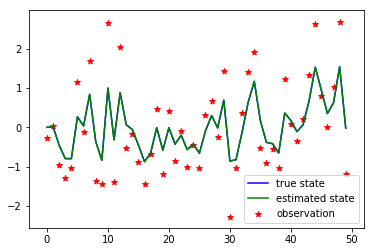

In [11]:
K_train = 1000
N_train = 1000

K_test = 20
N_test = 20

a_train, y_train = gen_nlin_toy_example(a_0=np.zeros((N_train, 1)), K=K_train)
a_test, y_test = gen_nlin_toy_example(a_0=np.zeros((N_test, 1)), K=K_test)

In [12]:
lmbda = 1e-2
kalman_filter = KalmanFilter(params_path=params_path, verbose = True)
kalman_filter.fit(A=a_train, Y=y_train, lmbda=lmbda)

F : [[0.49125459]]
F.shape : (1, 1)
Q : [[1.12529916]]
Q.shape : (1, 1)
G : [[0.53904301]]
G.shape (1, 1)
R : [[1.04331974]]
R.shape : (1, 1)


In [13]:
a_pred, P_pred = kalman_filter.predict(Y=y_test, a_0=np.zeros((N_test,1)), P_0=np.tile(A=np.identity(1)[np.newaxis,: , :], reps=(N_test,1,1)))
print(P_pred.shape)

(20, 20, 1, 1)


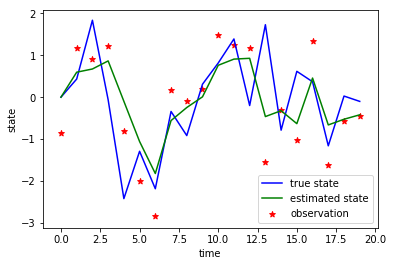

In [15]:
#visualisation of one trajectory
num_state = np.arange(K_test)
plt.figure()

plt.plot(num_state, a_test[0], color='blue', label='true state')
plt.plot(num_state, a_pred[0], color='green', label='estimated state')
#plt.plot(num_state, a_pred[0] - P_pred[0].ravel(), color='green', ls='dashed')
#plt.plot(num_state, a_pred[0] + P_pred[0].ravel(), color='green', ls='dashed')
plt.scatter(num_state, y_test[0], marker='*', color='red', label='observation')
plt.xlabel('time')
plt.ylabel('state')
plt.legend()
plt.show()

In [ ]:
P = np.ones((5,7))

F = 2*np.ones((2,7))

a = P[0,:]
print(P@F.T)

In [43]:
np.random.multivariate_normal(mean=np.zeros((5,)), cov = np.identity(5), size=7).shape

(7, 5)